La seconde partie de ce notebook (qui ne comporte qu'une question) requiert le module matplotlib :

- `pip install matplotlib` dans une fenêtre de commande Windows
- `pip install matplotlib` dans un terminal à partir de la page d'accueil de jupyter > bouton New > Terminal
- `pip install matplotlib` + moteur de recherche si jamais vous n'y arrivez pas

# Iris : présentation de la situation

Le jeu de données auquel nous allons nous intéresser est un jeu de données célèbre. Il a été créé et utilisé par Ronald Aylmer Fisher en 1936 (biologiste et statisticien) et concerne 3 espèces d'iris : setosa, virginica et versicolor. 

| Ronald Aylmer Fisher | Iris setosa | Iris virginica | Iris versicolor |
|:--------------------:|:-----------:|:--------------:|:---------------:|
| ![portrait](./images/portrait2.png) | ![portrait](./images/iris_setosa.jpg) | ![portrait](./images/iris_virginica.jpg) | ![portrait](./images/iris_versicolor.jpg) |

Ce jeu de données est composé de 50 individus pour chacune des trois espèces (setosa, versicolor, virginica) soit 150 individus en tout.  


Pour chacun de ces individus on dispose des champs :
```
- id              : numéro d'échantillon (identifiant)  

- longueur_sepale : longueur des sépales  

- largeur_sepale  : largeur des sépales  

- longueur_petale : longueur des pétales  

- largeur_petale  : largeur des pétales  

- espece          : 'Iris-setosa', 'Irid_virginica' ou 'Iris-versicolor'
```

La question que se posait M. Fisher est, vous l'avez sans doute devinée :

<div class = "alert alert-danger">

"Puis-je, à partir des longueurs et largeurs des sépales et pétales, prédire l'espèce d'un iris ?"
    
</div>

On va donc chercher, à partir des quatre descripteurs `longueur_sepale, largeur_sepale, longueur_petale` et `largeur_petale`, à effectuer une prédiction de l'étiquette `espece`.

# Import de la table de données

Après exécution de la cellule de code suivante, nous disposerons grâce au module `utilitaires_iris` d'une table `table_iris` contenant les 150 enregistrements sous forme de dictionnaires,  

In [1]:
import math
import copy

from utilitaires_iris import *

%matplotlib notebook

table_iris = charger_fichier_entete( './datas/iris.csv' )

<div class = "alert alert-info">

**Question :**  

En allant voir le code de `./utilitaire_iris.py` (fichier présent dans le même dossier que ce notebook, peut être ouvert avec Jupyter) ou en allant ouvrir le fichier `./datas/iris.csv` avec Notepad++, déterminer quel est le séparateur du fichier csv et quel est son encodage.  

On peut désormais accéder aux 150 enregistrements de `table_iris` :

In [2]:
table_iris[0]

{'id': '1',
 'longueur_sepale': '5.1',
 'largeur_sepale': '3.5',
 'longueur_petale': '1.4',
 'largeur_petale': '0.2',
 'espece': 'Iris-setosa'}

In [3]:
table_iris[149]

{'id': '150',
 'longueur_sepale': '5.9',
 'largeur_sepale': '3.0',
 'longueur_petale': '5.1',
 'largeur_petale': '1.8',
 'espece': 'Iris-virginica'}

<div class = "alert alert-danger">

**Question ($ \heartsuit $):**
    
Dans la table `table_iris`, les valeurs associées à chacun des champs sont des chaînes de caractères.  
    
Pour quels champs y aura-t-il besoin d'une conversion lorsqu'on effectuera des calculs ?

# Les 3 espèces d'iris sont-elles "séparées" les unes des autres ?

Nous avons eu l'intuition dans les exercices de cours (voir exercice 2) d'une condition "visuelle" pour que la méthode des k plus proches voisins fonctionne bien. Cette condition était qu'il est préférable que les individus ayant des étiquettes différentes soient situés dans des "zones" bien séparées.  


Nous allons rapidement visualiser ce qui se passe toujours grâce au module `utilitaires_iris`. Ce module nous permet d' afficher des projections 2D des données en choisissant deux descripteurs parmi les quatre (setosa en rouge, versicolor en vert et virginica en bleu) :

<IPython.core.display.Javascript object>


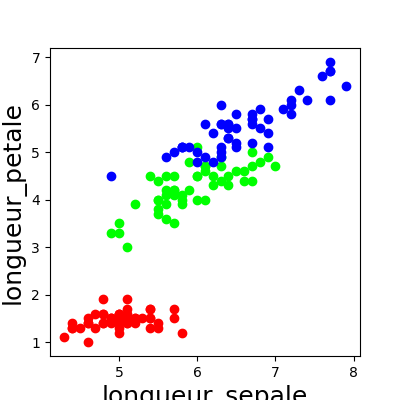

setosa : rouge, versicolor : vert, virginica : bleu


In [4]:
afficher_donnees_deux_colonnes("longueur_sepale", "longueur_petale", table_iris)

Ou bien afficher des projections 3D de ces données en choisissant trois descripteurs parmi quatre :

<IPython.core.display.Javascript object>


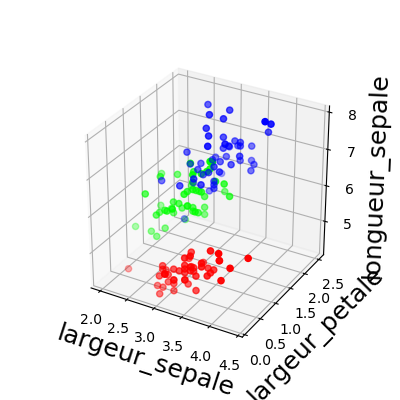

setosa : rouge, versicolor : vert, virginica : bleu


In [5]:
afficher_donnees_trois_colonnes("largeur_sepale", "largeur_petale", "longueur_sepale", table_iris)

<div class = "alert alert-info">

**Question :**
    
En modifiant les descripteurs utilisés dans les représentations graphiques ci-dessus, indiquer si les trois nuages de points classés par espèce sont bien séparés les uns des autres.   
    
    
En déduire si l'algorithme des k plus proches voisins risque de bien fonctionner ou pas.


# Implémentation de l'algorithme des k plus proches voisins

On rappelle que la formule de la distance dans le plan (en 2D) utilise les deux coordonnées $(x;y)$, dans l'espace (en 3D) utilise les trois coordonnées $(x;y;z)$ et en 4D les quatre coordonnées $(x;y;z;t)$.  

Le cas de la 4D nous est nécessaire ici puisque nous avons quatre descripteurs. Ce qui donne finalement pour deux points d'un espace 4D :

$$dist(A, B) = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2 + (z_B-z_A)^2 + (t_A-t_B)^2}$$

Pour faire cette partie, prenez votre cours et regardez l'algorithme des k plus proches voisins. Regardez aussi, sur la page 2 du cours, l'exemple de traitemet qui est donné : cela vous aidera à comprendre / voir ce que l'on attend des fonctions que vous avez à coder.  


Enfin chaque fonction peut être codée en moins de 5 lignes de code (vous aurez peut être des solutions plus longues : ce n'est pas grave).  


Néanmoins si vous arrivez à 20 lignes de code et que vous ... mmhhh... disons pataugez : contactez moi !  En règle générale : vous bloquez et vous commencez à vous agacer : contactez moi !


<div class = "alert alert-info">

**Question :**

Programmer ci-dessous le code d'une fonction `calculer_distance` qui :  

- prend en paramètre deux dictionnaires `iris_a` et `iris_b` ayant les quatre champs `longueur_sepale`, `largeur_sepale`, `longueur_petale`, `largeur_petale` comme ceux présents dans `table_iris`


- renvoie la distance **arrondie à trois décimales** entre ces deux iris en prenant en compte les valeurs de ces quatre champs.
 
Deux assertions qui doivent être vérifiées par votre fonction sont données ci-dessous.
 
**Rappel :**     
    
- Bien penser à la question marquée d'un ($\heartsuit$) en haut du notebook.  
    
- On utilisera `math.sqrt` du module `math` pour calculer la racine carrée et `**` pour mettre au carré.

- On utilisera `round(x, 3)` pour arrondir un nombre `x` en ne gardant que trois décimales.

In [2]:
def calculer_distance(iris_a, iris_b):
    pass

In [7]:
iris_alpha = table_iris[7]
iris_beta = table_iris[17]

iris_a_etiqueter = {'longueur_sepale':'5.5', 
                    'largeur_sepale':'3.3', 
                    'longueur_petale':'1.1', 
                    'largeur_petale':'0.2'}

assert(calculer_distance(iris_alpha, iris_a_etiqueter) == 0.648)
assert(calculer_distance(iris_beta, iris_a_etiqueter) == 0.548)

<div class = "alert alert-info">

**Question :**

Programmer ci-dessous le code d'une fonction `completer_avec_distances` qui :  

- prend en paramètre :  
      
    - une table `table` (comme `table_iris`)  contenant des dictionnaires représentant des iris 
    
    - un dictionnaire `iris_a_etiqueter` représentant un iris (celui à étiqueter) 
    

- renvoie une copie de `table_iris`, copie dans laquelle on a rajouté dans chacun des enregistrements un champ `distance` (dont la valeur est la distance entre l'enregistrement et `iris_a_diagnostiquer` arrondie à 3 décimales)   

Deux assertions qui doivent être vérifiées par votre fonction sont données ci-dessous.
    
**Rappel :**  
    
- Pour effectuer la copie de la table on utilisera `copy.deepcopy(table)` du module `copy`. ($\spadesuit$)

In [3]:
def completer_avec_distance(table, iris_a_etiqueter):
    pass

In [9]:
table_iris = charger_fichier_entete( './datas/iris.csv' )

iris_a_etiqueter = {'longueur_sepale':'5.5', 
                    'largeur_sepale':'3.3', 
                    'longueur_petale':'1.1', 
                    'largeur_petale':'0.2'}

table_completee = completer_avec_distance(table_iris, iris_a_etiqueter)

assert( table_completee[7]['distance'] == 0.648 )
assert( table_completee[17]['distance'] == 0.548 )

<div class = "alert alert-info">

**Question :**

Programmer ci-dessous le code d'une fonction `trier_puis_extraire` qui :  

- prend en paramètre :  
    
    - une table `table` (comme `table_completee`)  contenant des dictionnaires représentant des iris **avec en plus le champ `distance`**  
    
    - un nombre entier `k`
    
- trie la table selon la distance croissante,

- renvoie la liste des étiquettes (c'est à dire la liste des valeurs du champ `espece`) des `k` premiers iris de la table triée
  
  

Une assertion qui doit être vérifiée par votre fonction est donnée ci-dessous.
    
**Rappel :**  
    
- Vous aurez besoin de créer une fonction `clef de tri` (voir le cours sur le traitement de données en table).

In [4]:
def clef_de_tri(iris):
    pass

def trier_puis_extraire(table, k):
    pass



In [11]:
table_iris = charger_fichier_entete( './datas/iris.csv' )

iris_a_etiqueter = {'longueur_sepale':'6.5', 
                    'largeur_sepale':'2.8', 
                    'longueur_petale':'5.0', 
                    'largeur_petale':'1.5'}

table_completee = completer_avec_distance(table_iris, iris_a_etiqueter)
liste_k_etiquettes = trier_puis_extraire(table_completee, 5)
assert( liste_k_etiquettes ==  ['Iris-virginica','Iris-versicolor','Iris-versicolor',
                                'Iris-versicolor','Iris-virginica'])

table_completee = completer_avec_distance(table_iris, iris_a_etiqueter)
liste_k_etiquettes = trier_puis_extraire(table_completee, 1)
assert( liste_k_etiquettes ==  ['Iris-virginica'])

<div class = "alert alert-info">

**Question :**  
    
Trouver sur le site *stackoverflow* en anglais une méthode très courte (en une ligne de code) pour obtenir *l'élément le plus commun présent dans une liste* et intégrez cela dans un fonction `extraire_element_majoritaire`.  
    
    
 Pour cela, dans un moteur de recherche, saisir stackoverflow + mots de recherche bien choisis en anglais.
 
Vous noterez en commentaire l'URL de la page consultée.  
    
Une assertion vérifiée par votre fonction est donnée ci-dessous.
    
    
    Chercher 'how to find the most common element of a list stackoverflow'
    https://stackoverflow.com/questions/1518522/find-the-most-common-element-in-a-list

In [5]:
def extraire_element_majoritaire(liste):
    pass

In [13]:
assert(extraire_element_majoritaire(['bip', 'bip', 'blip', 'blip', 'bip']) == 'bip')
assert(extraire_element_majoritaire([1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]) == 5)

<div class = "alert alert-info">

**Question :**  
    
Intégrez tout ce qui précdède dans une unique fonction `algo_k_plus_proches_voisins` qui prend en paramètres :  
    
- un nombre entier `k`,  
    
- une table d'iris étiquetés `table_iris`,  

- et un iris non étiqueté `iris_a_etiqueter` 
    
et renvoie l'étiquette de `iris_a_etiqueter` obtenue selon l'algorithme des k plus proches voisins.

In [6]:
def algo_k_plus_proches_voisins(k, table_iris, iris_a_etiqueter):
    pass

In [15]:
table_iris = charger_fichier_entete( './datas/iris.csv' )

iris_a_etiqueter = {'longueur_sepale':'6.5', 
                    'largeur_sepale':'2.8', 
                    'longueur_petale':'5.0', 
                    'largeur_petale':'1.5'}

assert(algo_k_plus_proches_voisins(5, table_iris, iris_a_etiqueter) == 'Iris-versicolor')
assert(algo_k_plus_proches_voisins(1, table_iris, iris_a_etiqueter) == 'Iris-virginica')

<div class = "alert alert-danger">
    
*POINT CULTURE*
    
( $\spadesuit$ ) : Rappelons que copier une table est normalement une pratique à éviter (une table c'est potentiellement lourd donc c'est coûteux à copier).   
    
    
On le fait ici pour "alléger" le code et éviter d'avoir trop de lignes de code dans nos fonctions.   

Disons en résumé que cette mauvaise pratique (copier une table) est faite ici pour des motifs pédagogiques (aussi contradictoire que cela puisse paraître).
    

( $\spadesuit$ $\spadesuit$) Rappelons aussi que la méthode `sorted` utilisée pour trier a un avantage : elle renvoie une copie triée de la liste qui lui est fournie. La liste de départ peut donc, si on le souhaite, être laissée intacte. C'est bien car il peut arriver qu'on souhaite garder un 'original' de la liste à trier.  
    
Néanmoins c'est coûteux de recopier.  La méthode `sort` elle fait le contraire : elle modifie la liste à trier ce qui est moins coûteux (on dit qu'lle trie "en place") mais est gênant si on veut garder une trace de l'original.